In [401]:
import os
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (15, 3)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'
#import seaborn
import pickle
from scipy import stats

In [3]:
pwd = os.getcwd()

In [361]:
with open('trip_df.pickle', 'rb') as handle:
    trip_df = pickle.load(handle)

# Speed 

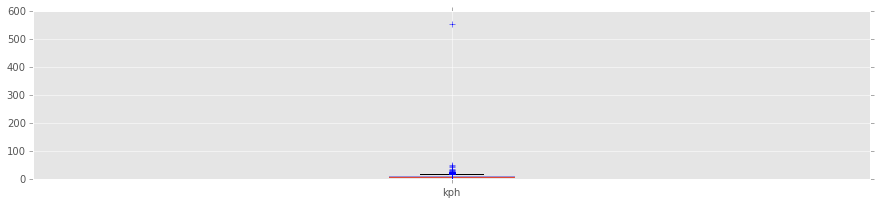

In [364]:
trip_df.boxplot(['kph'], return_type='axes')

In [365]:
# this doesn't look humanly possible, so let's remove this datapoint 
trip_df[trip_df['kph']>500]

,Bike #,Duration,end_date,End Station,End Terminal,start_date,Start Station,Start Terminal,Subscriber Type,Trip ID,...,start_lon_rad,dLON,dLAT,a1,a2,a3,a4,a,distance,kph
28563,232,236,2013-10-02 08:31:00,Civic Center BART (7th at Market),72,2013-10-02 08:27:00,Redwood City Caltrain Station,22,Subscriber,42493,...,-2.133352,0.003156,-0.005136,0.000007,0.790365,0.793501,0.000002,0.000008,36.368195,554.769073


In [366]:
trip_df = trip_df[trip_df['kph']<500]

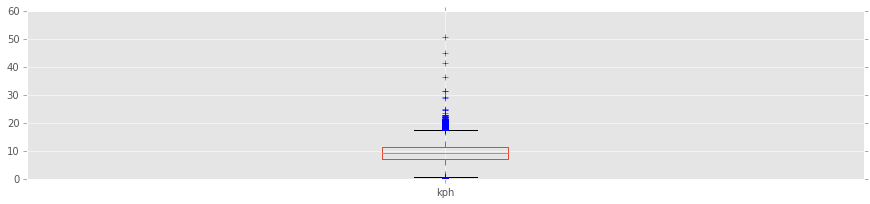

In [367]:
trip_df.boxplot(['kph'], return_type='axes')

In [368]:
trip_df[trip_df['kph']>40]

,Bike #,Duration,end_date,End Station,End Terminal,start_date,Start Station,Start Terminal,Subscriber Type,Trip ID,...,start_lon_rad,dLON,dLAT,a1,a2,a3,a4,a,distance,kph
109190,422,2525,2014-01-13 17:29:00,Redwood City Caltrain Station,22,2014-01-13 16:46:00,2nd at Townsend,61,Subscriber,151731,...,-2.136113,-0.002761,0.005139,0.000007,0.793501,0.790363,0.000002,0.000008,35.559243,50.698327
178048,705,3553,2014-07-29 19:32:00,San Francisco Caltrain (Townsend at 4th),70,2014-07-29 18:33:00,California Ave Caltrain Station,36,Subscriber,385606,...,-2.131794,0.004406,-0.006066,0.000009,0.790405,0.794106,0.000005,0.000012,44.558834,45.148270
282653,446,3237,2014-04-10 18:29:00,Redwood City Caltrain Station,22,2014-04-10 17:35:00,Commercial at Montgomery,45,Customer,244143,...,-2.136334,-0.002982,0.005378,0.000007,0.793501,0.790217,0.000002,0.000009,37.397851,41.591678


In [ ]:
# according to wikipedia 
# On a racing bicycle, a reasonably fit rider can ride at 40 km/h (25 mph) on flat ground for short periods
# meaning that we can assume that these trips were made by car (cycle transport) or the data is incorrect 


In [369]:
trip_df = trip_df[trip_df['kph']<40]

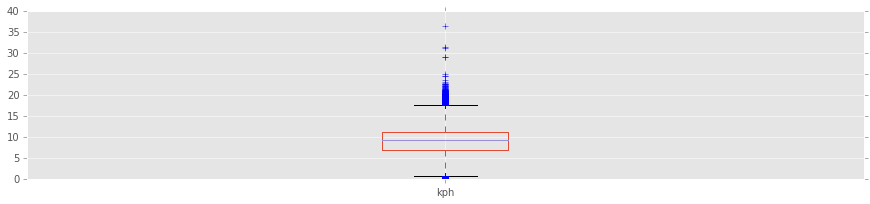

In [370]:
trip_df.boxplot(['kph'], return_type='axes')

In [371]:
# this starts to be beliavable so let's assume someone is really fit in San Fransisco
trip_df[trip_df['kph']>34]

,Bike #,Duration,end_date,End Station,End Terminal,start_date,Start Station,Start Terminal,Subscriber Type,Trip ID,...,start_lon_rad,dLON,dLAT,a1,a2,a3,a4,a,distance,kph
207899,561,246,2014-06-29 16:36:00,Townsend at 7th,65,2014-06-29 16:32:00,Embarcadero at Folsom,51,Subscriber,344040,...,-2.136127,0.000204,0.000356,3.171104e-08,0.790465,0.790246,1.039450e-08,3.820409e-08,2.488971,36.423959


In [372]:
# average speed
trip_df['kph'].mean()

8.787072174859905

In [377]:
# calculating the average and std of speed by subscriper types
customer_type_speed = trip_df.groupby('Subscriber Type').agg({'kph': ['mean', 'std']})

In [378]:
customer_type_speed

kph          
                     mean       std
Subscriber Type                    
Customer         4.729348  3.795995
Subscriber       9.724715  3.055305

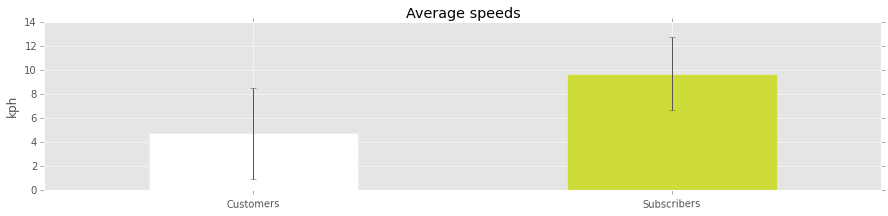

In [390]:
means = customer_type_speed['kph']['mean']
errors = customer_type_speed['kph']['std']
fig, ax = plt.subplots()
fig = means.plot(yerr=errors, ax=ax, kind='bar', color=['white', '#CDDC39'])
fig.set_xticklabels(['Customers', 'Subscribers'], rotation=1)
fig.set_ylabel('kph')
fig.set_xlabel('')
fig.set_title('Average speeds')


In [405]:
customers = trip_df[trip_df['Subscriber Type']=='Customer']
subscribers = trip_df[trip_df['Subscriber Type']=='Subscriber']


(4950.0838511818783, 0.0)

In [406]:
# checking of equality of variances
stats.bartlett(customers['kph'], subscribers['kph'])

(4950.0838511818783, 0.0)

In [407]:
# as variances are not equel, the Welch's t-test is used
stats.ttest_ind(customers['kph'], subscribers['kph'], equal_var = False)

(-298.80859359783352, 0.0)

In [ ]:
# Subscribers are significantly faster than Customers

# Distance

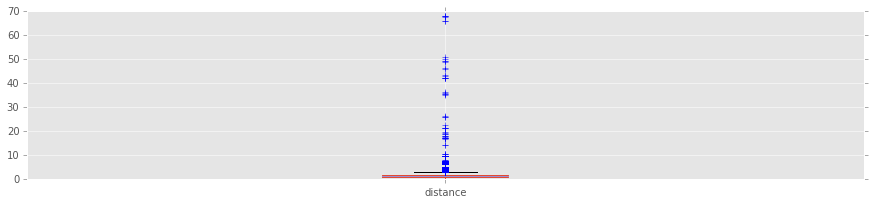

In [392]:
trip_df.boxplot(['distance'], return_type='axes')

In [393]:
trip_df[trip_df['distance']>=68]

,Bike #,Duration,end_date,End Station,End Terminal,start_date,Start Station,Start Terminal,Subscriber Type,Trip ID,...,start_lon_rad,dLON,dLAT,a1,a2,a3,a4,a,distance,kph
70821,30,12088,2013-11-16 14:07:00,Civic Center BART (7th at Market),72,2013-11-16 10:46:00,San Jose Civic Center,3,Customer,98343,...,-2.127364,0.009144,-0.007848,0.000015,0.790365,0.795149,0.000021,0.000029,68.023961,20.258625


In [394]:
# calculating the average and std of trip distances by subscriper types
customer_type_dist = trip_df.groupby('Subscriber Type').agg({'distance': ['mean', 'std']})

In [395]:
customer_type_dist

distance          
                     mean       std
Subscriber Type                    
Customer         1.253506  1.335631
Subscriber       1.318284  0.666768

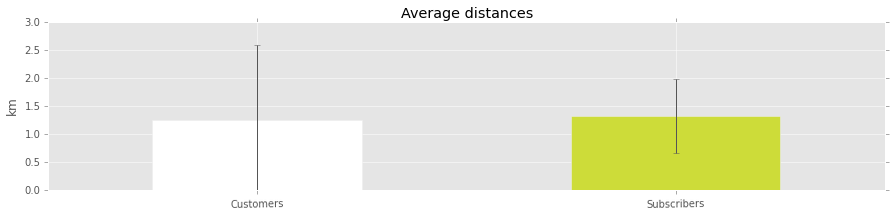

In [399]:
means = customer_type_dist['distance']['mean']
errors = customer_type_dist['distance']['std']
fig, ax = plt.subplots()
fig = means.plot(yerr=errors, ax=ax, kind='bar', color=['white', '#CDDC39'], ylim=(0,3))
fig.set_xticklabels(['Customers', 'Subscribers'], rotation=1)
fig.set_ylabel('km')
fig.set_xlabel('')
fig.set_title('Average distances')

In [410]:
# checking of equality of variances
stats.bartlett(customers['distance'], subscribers['distance'])

(59175.635916360683, 0.0)

In [411]:
# as variances are not equel, the Welch's t-test is used
stats.ttest_ind(customers['distance'], subscribers['distance'], equal_var = False)

(-11.482190497529507, 1.7326736937196994e-30)

In [ ]:
# The difference is not significant

# Route

In [412]:
routes = trip_df.groupby([trip_df['Start Station'], trip_df['End Station']]).count()

In [413]:
routes.reset_index(inplace=True)

In [414]:
routes['count'] = routes['Duration']

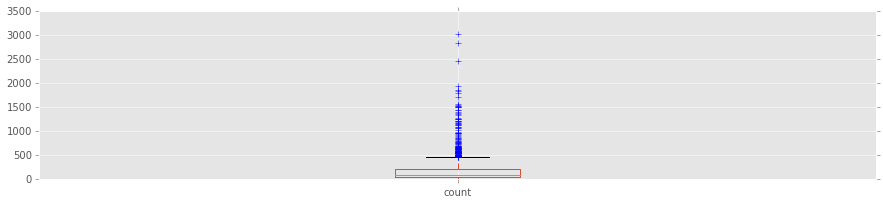

In [415]:
routes.boxplot(['count'], return_type='axes')

In [416]:
# most popular route
routes[routes['count']==routes['count'].max()]
most_popular_start = routes[routes['count']==routes['count'].max()]['Start Station']
most_popular_end = routes[routes['count']==routes['count'].max()]['End Station']

In [417]:
# average speed on the most popular route
most_popular_trips = trip_df[(trip_df['Start Station']==most_popular_start.values[0]) & (trip_df['End Station']==most_popular_end.values[0])]
most_popular_trips['kph'].mean()

7.963524459446054

In [418]:
# average trip duration on the most popular route
most_popular_trips['Duration'].mean()/60

23.738638622060286

In [419]:
most_popular_start.values[0], most_popular_end.values[0]

('Harry Bridges Plaza (Ferry Building)', 'Embarcadero at Sansome')

In [420]:
routes['count'].max()

3019

In [421]:
most_popular_trips['distance'].describe()

count    3.019000e+03
mean     1.309522e+00
std      8.350260e-14
min      1.309522e+00
25%      1.309522e+00
50%      1.309522e+00
75%      1.309522e+00
max      1.309522e+00
Name: distance, dtype: float64

In [422]:
# finding the fastest route on average
route_duration = trip_df.groupby([trip_df['Start Station'], trip_df['End Station']])['Duration'].mean()

In [423]:
route_duration_df = pd.DataFrame(route_duration)

In [424]:
route_duration_df.reset_index(inplace=True)

In [425]:
route_duration_df.sort('Duration').head()

,Start Station,End Station,Duration
214,Beale at Market,Temporary Transbay Terminal (Howard at Beale),134.782114
367,Commercial at Montgomery,Clay at Battery,216.052632
180,Arena Green / SAP Center,Santa Clara at Almaden,216.643098
344,Clay at Battery,Mechanics Plaza (Market at Battery),230.059880
412,Davis at Jackson,Beale at Market,244.792035


In [426]:
# converting to minuts
route_duration_df.sort('Duration')['Duration'][0]/60

69.827731092436977

# Scatterplots by stations

In [83]:
with open('station_df.pickle', 'rb') as handle:
    station_df = pickle.load(handle)

In [96]:
san_francisco = station_df[station_df['landmark'] == 'San Francisco']
redwood_city = station_df[station_df['landmark'] == 'Redwood City']
palo_alto = station_df[station_df['landmark'] == 'Palo Alto']
mountain_view = station_df[station_df['landmark'] == 'Mountain View']
san_jose = station_df[station_df['landmark'] == 'San Jose']


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10c329fd0>], dtype=object)

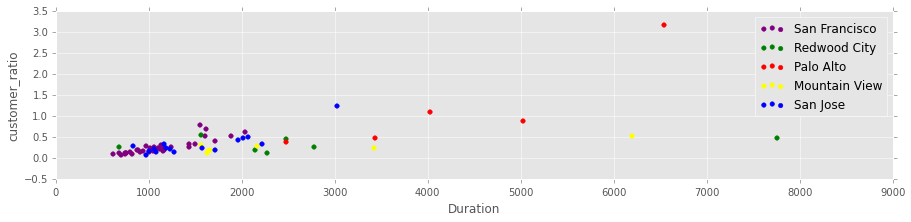

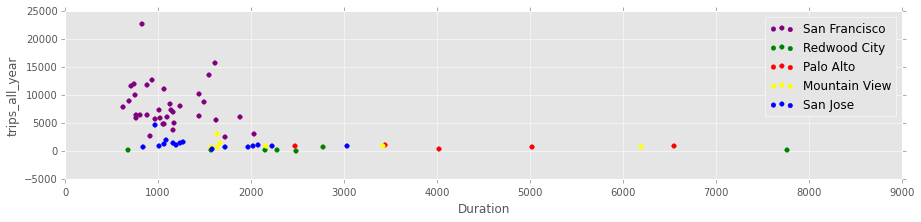

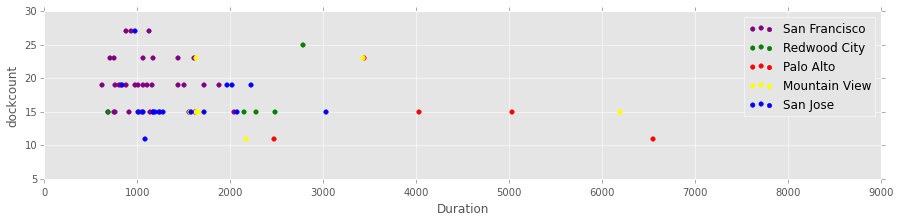

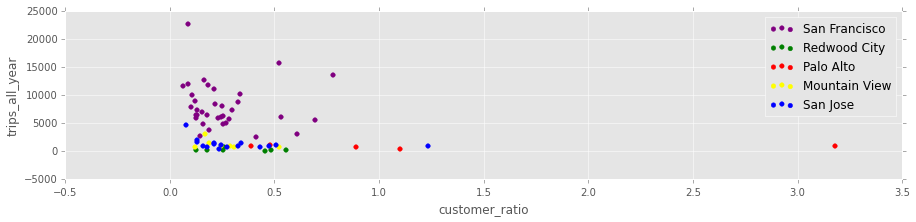

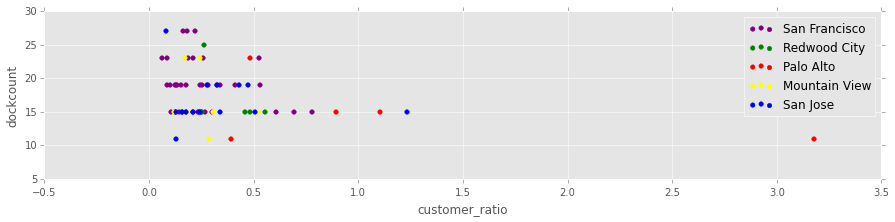

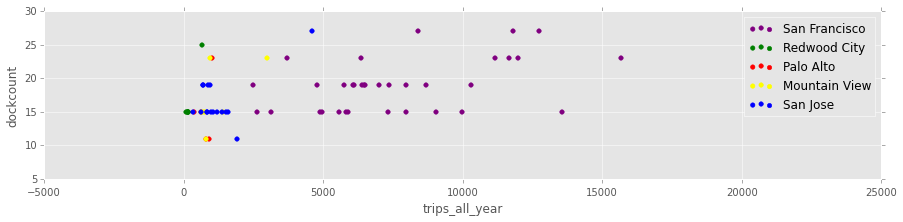

In [104]:
ax = san_francisco.plot(kind='scatter', x='Duration', y='customer_ratio', color='purple', label='San Francisco')
ax = redwood_city.plot(kind='scatter', x='Duration', y='customer_ratio', color='green', label='Redwood City', ax=ax)
ax = palo_alto.plot(kind='scatter', x='Duration', y='customer_ratio', color='red', label='Palo Alto', ax=ax)
ax = mountain_view.plot(kind='scatter', x='Duration', y='customer_ratio', color='yellow', label='Mountain View', ax=ax)
san_jose.plot(kind='scatter', x='Duration', y='customer_ratio', color='blue', label='San Jose', ax=ax, subplots=True)

bx = san_francisco.plot(kind='scatter', x='Duration', y='trips_all_year', color='purple', label='San Francisco')
bx = redwood_city.plot(kind='scatter', x='Duration', y='trips_all_year', color='green', label='Redwood City', ax=bx)
bx = palo_alto.plot(kind='scatter', x='Duration', y='trips_all_year', color='red', label='Palo Alto', ax=bx)
bx = mountain_view.plot(kind='scatter', x='Duration', y='trips_all_year', color='yellow', label='Mountain View', ax=bx)
san_jose.plot(kind='scatter', x='Duration', y='trips_all_year', color='blue', label='San Jose', ax=bx, subplots=True)

cx = san_francisco.plot(kind='scatter', x='Duration', y='dockcount', color='purple', label='San Francisco')
cx = redwood_city.plot(kind='scatter', x='Duration', y='dockcount', color='green', label='Redwood City', ax=cx)
cx = palo_alto.plot(kind='scatter', x='Duration', y='dockcount', color='red', label='Palo Alto', ax=cx)
cx = mountain_view.plot(kind='scatter', x='Duration', y='dockcount', color='yellow', label='Mountain View', ax=cx)
san_jose.plot(kind='scatter', x='Duration', y='dockcount', color='blue', label='San Jose', ax=cx, subplots=True)

dx = san_francisco.plot(kind='scatter', x='customer_ratio', y='trips_all_year', color='purple', label='San Francisco')
dx = redwood_city.plot(kind='scatter', x='customer_ratio', y='trips_all_year', color='green', label='Redwood City', ax=dx)
dx = palo_alto.plot(kind='scatter', x='customer_ratio', y='trips_all_year', color='red', label='Palo Alto', ax=dx)
dx = mountain_view.plot(kind='scatter', x='customer_ratio', y='trips_all_year', color='yellow', label='Mountain View', ax=dx)
san_jose.plot(kind='scatter', x='customer_ratio', y='trips_all_year', color='blue', label='San Jose', ax=dx, subplots=True)

ex = san_francisco.plot(kind='scatter', x='customer_ratio', y='dockcount', color='purple', label='San Francisco')
ex = redwood_city.plot(kind='scatter', x='customer_ratio', y='dockcount', color='green', label='Redwood City', ax=ex)
ex = palo_alto.plot(kind='scatter', x='customer_ratio', y='dockcount', color='red', label='Palo Alto', ax=ex)
ex = mountain_view.plot(kind='scatter', x='customer_ratio', y='dockcount', color='yellow', label='Mountain View', ax=ex)
san_jose.plot(kind='scatter', x='customer_ratio', y='dockcount', color='blue', label='San Jose', ax=ex, subplots=True)

fx = san_francisco.plot(kind='scatter', x='trips_all_year', y='dockcount', color='purple', label='San Francisco')
fx = redwood_city.plot(kind='scatter', x='trips_all_year', y='dockcount', color='green', label='Redwood City', ax=fx)
fx = palo_alto.plot(kind='scatter', x='trips_all_year', y='dockcount', color='red', label='Palo Alto', ax=fx)
fx = mountain_view.plot(kind='scatter', x='trips_all_year', y='dockcount', color='yellow', label='Mountain View', ax=fx)
san_jose.plot(kind='scatter', x='trips_all_year', y='dockcount', color='blue', label='San Jose', ax=fx, subplots=True)


# Bike usage by day

In [427]:
daily = trip_df.groupby(['day_of_week', 'Subscriber Type']).count()

In [428]:
daily = daily.unstack(level='Subscriber Type') 

In [429]:
daily = daily['Duration']

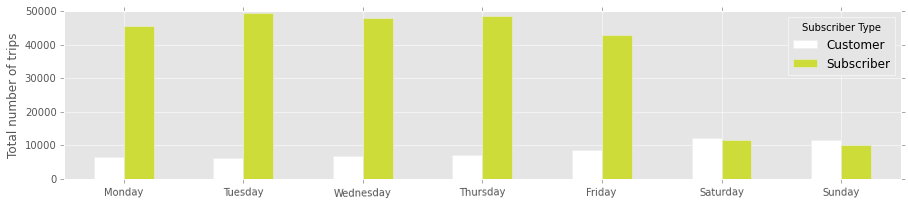

In [430]:
ax = daily.plot(kind='bar', color=['white', '#CDDC39'])
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=1)
ax.set_ylabel('Total number of trips')
ax.set_xlabel('')

In [431]:
holidaily = trip_df.groupby(['is_holiday', 'Subscriber Type']).count()
holidaily = holidaily.unstack(level='Subscriber Type') 
holidaily = holidaily['Duration']

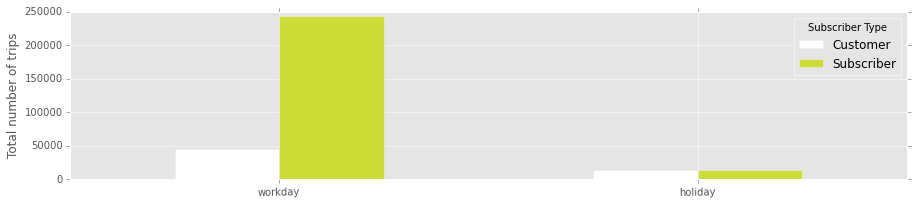

In [432]:
ax = holidaily.plot(kind='bar', color=['white', '#CDDC39'])
ax.set_xticklabels(['workday', 'holiday'], rotation=1)
ax.set_ylabel('Total number of trips')
ax.set_xlabel('')

# Bike usage by hour

In [433]:
trip_df['time_of_day'] = trip_df.start_date.dt.hour

In [434]:
hourly = trip_df.groupby(['time_of_day', 'Subscriber Type']).count()
hourly = hourly.unstack(level='Subscriber Type') 
hourly = hourly['Duration']

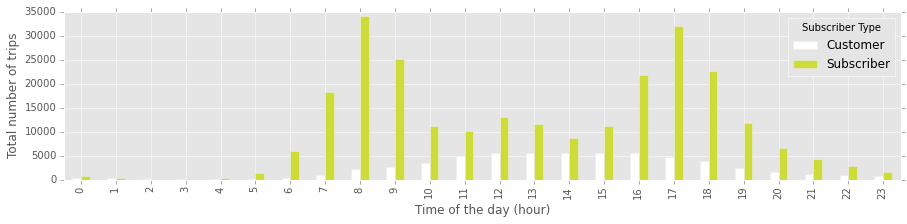

In [435]:
ax = hourly.plot(kind='bar', color=['white', '#CDDC39'])
ax.set_ylabel('Total number of trips')
ax.set_xlabel('Time of the day (hour)')

# drunk cyclists?

In [552]:
trip_df['Duration in minutes'] = trip_df['Duration']/60

In [553]:
night_trips = trip_df[trip_df['time_of_day']<4]

In [554]:
night_trips_daily = night_trips.groupby(['day_of_week']).count()

In [555]:
night_trips_daily = night_trips_daily['Duration']

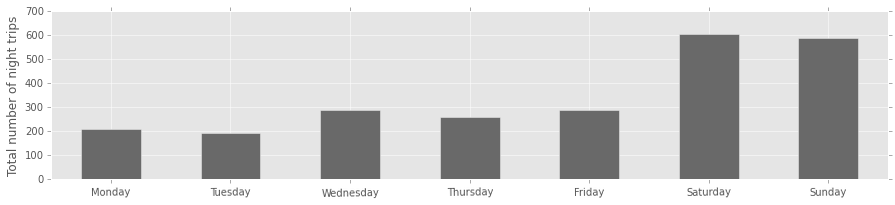

In [556]:
ax = night_trips_daily.plot(kind='bar', color='dimgrey')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=1)
ax.set_ylabel('Total number of night trips')
ax.set_xlabel('')

circle trip in the middle of the night? out of beer?

In [557]:
night_circles = trip_df[(trip_df['time_of_day']<4) & (trip_df['Start Terminal']==trip_df['End Terminal'])]

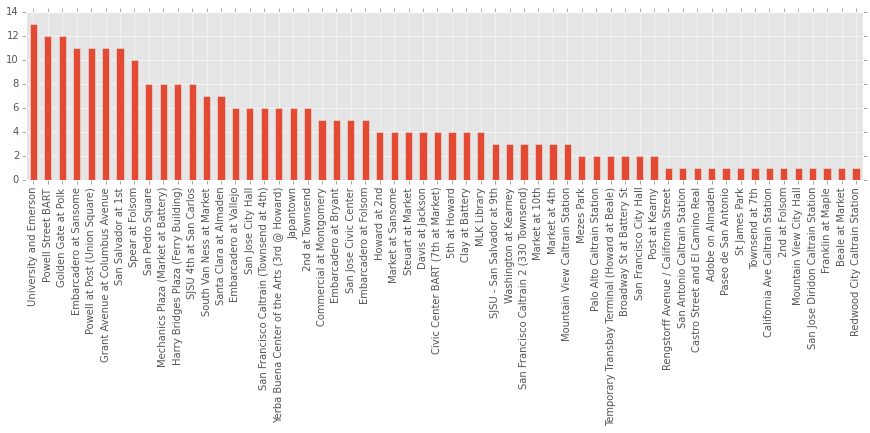

In [558]:
night_circles['Start Station'].value_counts().plot(kind='bar')

In [559]:
night_froma_tob = trip_df[(trip_df['time_of_day']<4) & (trip_df['Start Terminal']!=trip_df['End Terminal'])]

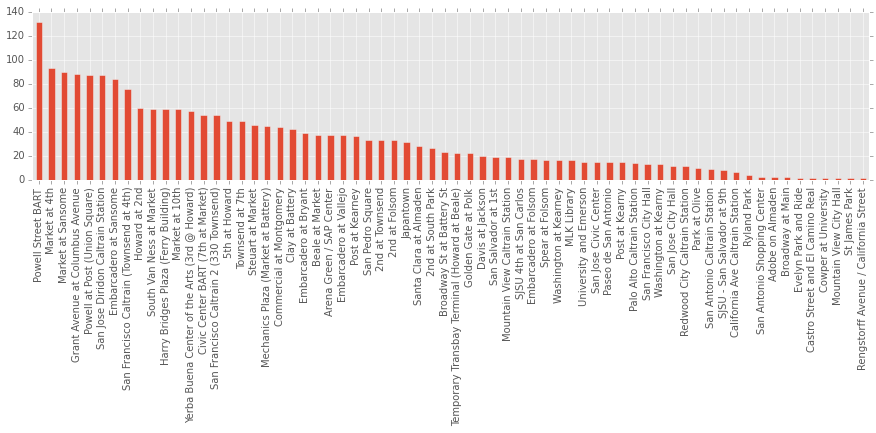

In [560]:
night_froma_tob['Start Station'].value_counts().plot(kind='bar')

In [561]:
night_circles.shape, night_froma_tob.shape

((269, 34), (2162, 34))

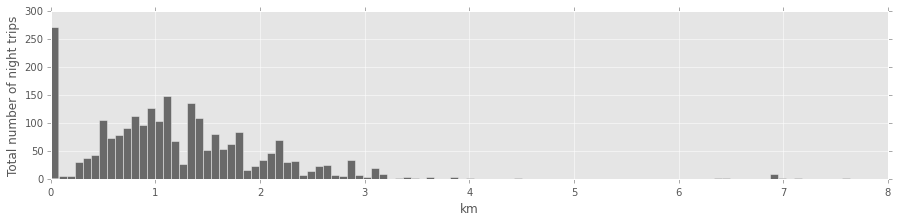

In [562]:
night_trips.hist('distance', bins=100, color='dimgrey')
plt.ylabel('Total number of night trips')
plt.xlabel('km')
plt.title('')

In [563]:
night_circles['Duration in minutes'].quantile(0.99)

1274.602666666666

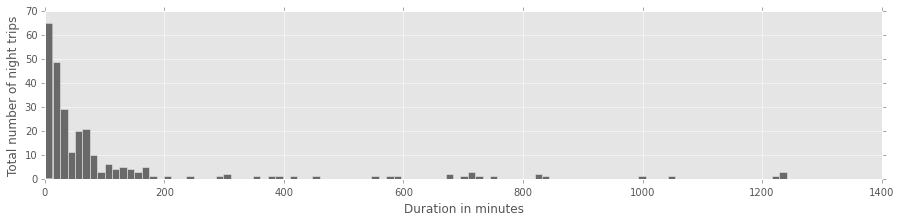

In [564]:
night_circles[night_circles['Duration in minutes']<night_circles['Duration in minutes'].quantile(0.99)].hist('Duration in minutes', bins=100, color='dimgrey')
plt.ylabel('Total number of night trips')
plt.xlabel('Duration in minutes')
plt.title('')

In [565]:
night_circles['Duration in minutes'].quantile(0.5)

33.016666666666666

In [566]:
day_trips = trip_df[trip_df['time_of_day']>4]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17d8b3390>]], dtype=object)

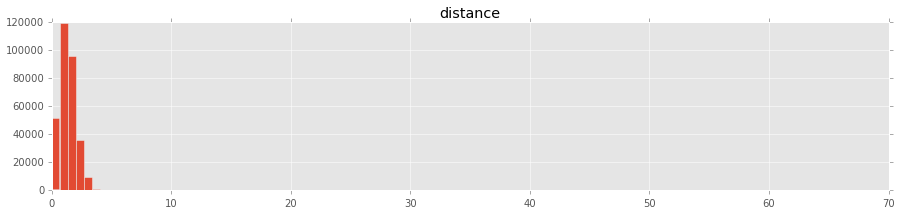

In [567]:
day_trips.hist('distance', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17dd369e8>]], dtype=object)

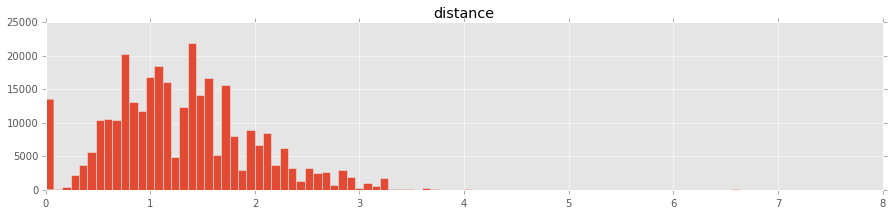

In [568]:
day_trips[day_trips['distance']<8].hist('distance', bins=100)

In [569]:
day_circles = trip_df[(trip_df['time_of_day']>4) & (trip_df['Start Terminal']==trip_df['End Terminal'])]

In [570]:
day_circles['Duration in minutes'].quantile(0.99)

1281.466166666665

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x180dba0f0>]], dtype=object)

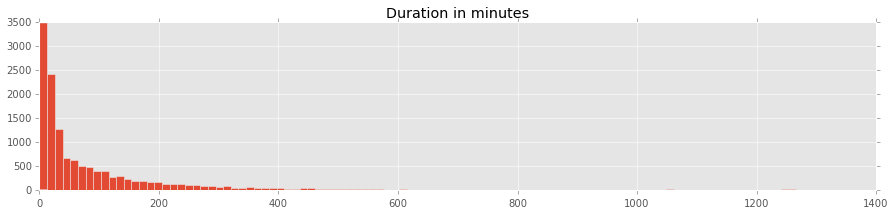

In [571]:
day_circles[day_circles['Duration in minutes']<day_circles['Duration in minutes'].quantile(0.99)].hist('Duration in minutes', bins=100)

In [572]:
night_circle_ratio = len(night_circles)/len(night_trips)

In [573]:
day_circle_ratio = len(day_circles)/len(day_trips)

In [574]:
means=pd.DataFrame([night_circle_ratio, day_circle_ratio])

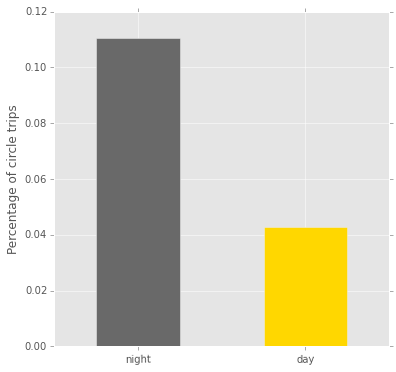

In [577]:
fig, ax = plt.subplots()
fig = means.plot(ax=ax, kind='bar', color=['dimgrey', 'gold'], legend=False, figsize=(6,6))
fig.set_xticklabels(['night', 'day'], rotation=1)
fig.set_ylabel('Percentage of circle trips')
fig.set_xlabel('')
#fig.set_title('Average distances')